<a name="top"></a>
# Uber Models

## Contents:
**1. [Exploration Data Analysis (EDA) for Uber Data](#Exploration-Data-Analysis-(EDA)-for-Uber-Data)**

**2. [Building the Linear regression model for Uber](#Building-the-Linear-regression-model-for-Uber)**

**3. [2nd Model for Uber Data Using Elastic Net](#2nd-Model-for-Uber-Data-Using-Elastic-Net)**

**4. [3rd Model for Uber Data Using Random Forest Regressor](#3rd-Model-for-Uber-Data-Using-Random-Forest-Regressor)**

**5. [4th Model for Lyft Data Using XGBOOST Regressor](#4th-Model-for-Lyft-Data-Using-XGBOOST-Regressor)**

**6. [Results of Summary](#Results-of-Summary)**




## Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, ElasticNet, LogisticRegression, Lasso, Ridge, HuberRegressor
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
import statsmodels.api as sm
import pickle

plt.style.use('fivethirtyeight')

%matplotlib inline

<a name="Exploration Data Analysis (EDA) for Uber Data"></a>
# Exploration Data Analysis (EDA) for Uber Data


In [3]:
uber_data = pd.read_csv('uber.csv')

In [4]:
#Removed cab_type from the dataset 
uber_data = uber_data.drop(["cab_type", 'Unnamed: 0'], axis=1)

In [5]:
uber_data.columns

Index(['distance', 'price', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'],
      dtype='object')

In [6]:
uber_data.price.describe()

count    615126.000000
mean         15.598276
std           8.535459
min           4.500000
25%           9.000000
50%          12.500000
75%          21.000000
max          89.500000
Name: price, dtype: float64

In [7]:
#Creating price bins
uber_data['price_bins'] = pd.cut(uber_data.price, bins = [0,10,20,30,40,50,60,70,80,90],
                                labels = ['0-10','10-20','20-30','30-40','40-50','50-60',
                                         '60-70','70-80','80-90'])

In [8]:
# Analyzing Price data based on the bins that we have created
uber_data['price_bins'].value_counts(normalize = True)

0-10     0.368720
10-20    0.364270
20-30    0.192491
30-40    0.066434
40-50    0.007452
50-60    0.000588
60-70    0.000034
80-90    0.000007
70-80    0.000005
Name: price_bins, dtype: float64

# Correlation Matrix to observe the collinearity between features and the correlation with the target column

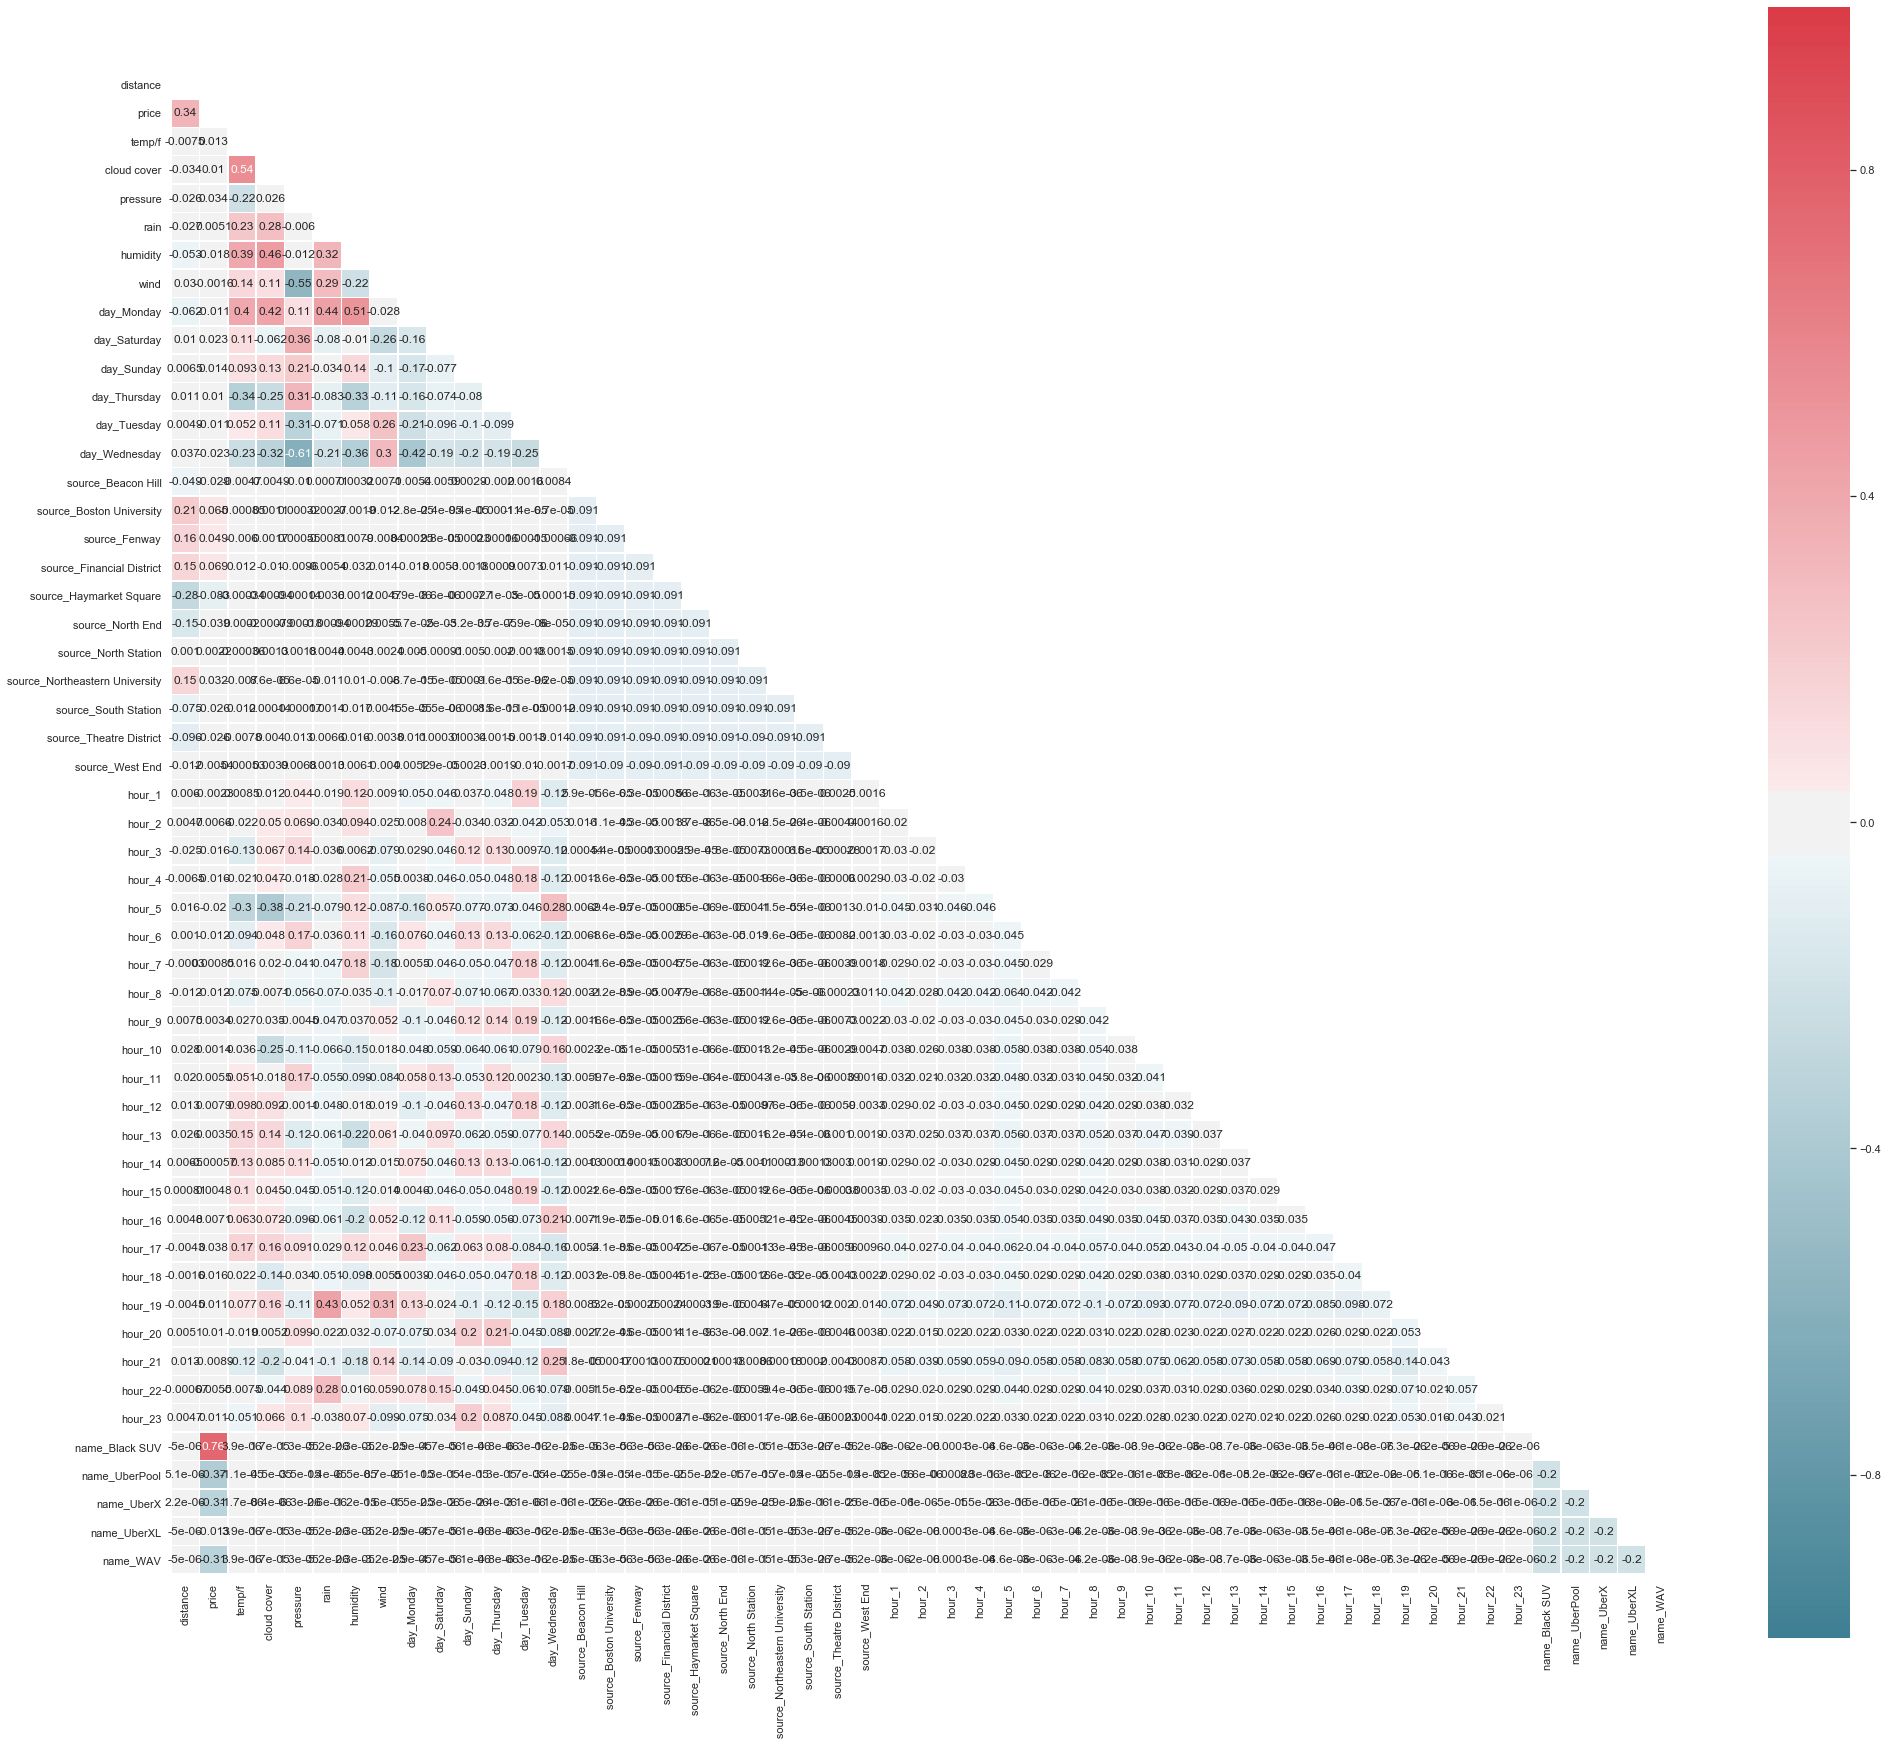

In [75]:
#Done with cleaning, we need to do the correlation matrix (Heatmap)
# Compute the correlation matrix
sns.set(style="white")
corr = uber_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 30))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, annot  = True)


In [76]:
abs(uber_data.corr()['price']).sort_values(ascending = False)

price                             1.000000
name_Black SUV                    0.757649
name_UberPool                     0.372518
distance                          0.335100
name_WAV                          0.314943
name_UberX                        0.314928
source_Haymarket Square           0.082578
source_Financial District         0.068899
source_Boston University          0.064874
source_Fenway                     0.048710
source_North End                  0.038740
hour_17                           0.037575
pressure                          0.034314
source_Northeastern University    0.032054
source_Beacon Hill                0.028895
source_Theatre District           0.026314
source_South Station              0.026196
day_Wednesday                     0.023319
day_Saturday                      0.023268
hour_5                            0.020347
humidity                          0.018050
hour_18                           0.016339
hour_4                            0.016203
hour_3     

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x147f7f908>,
      dtype=object)

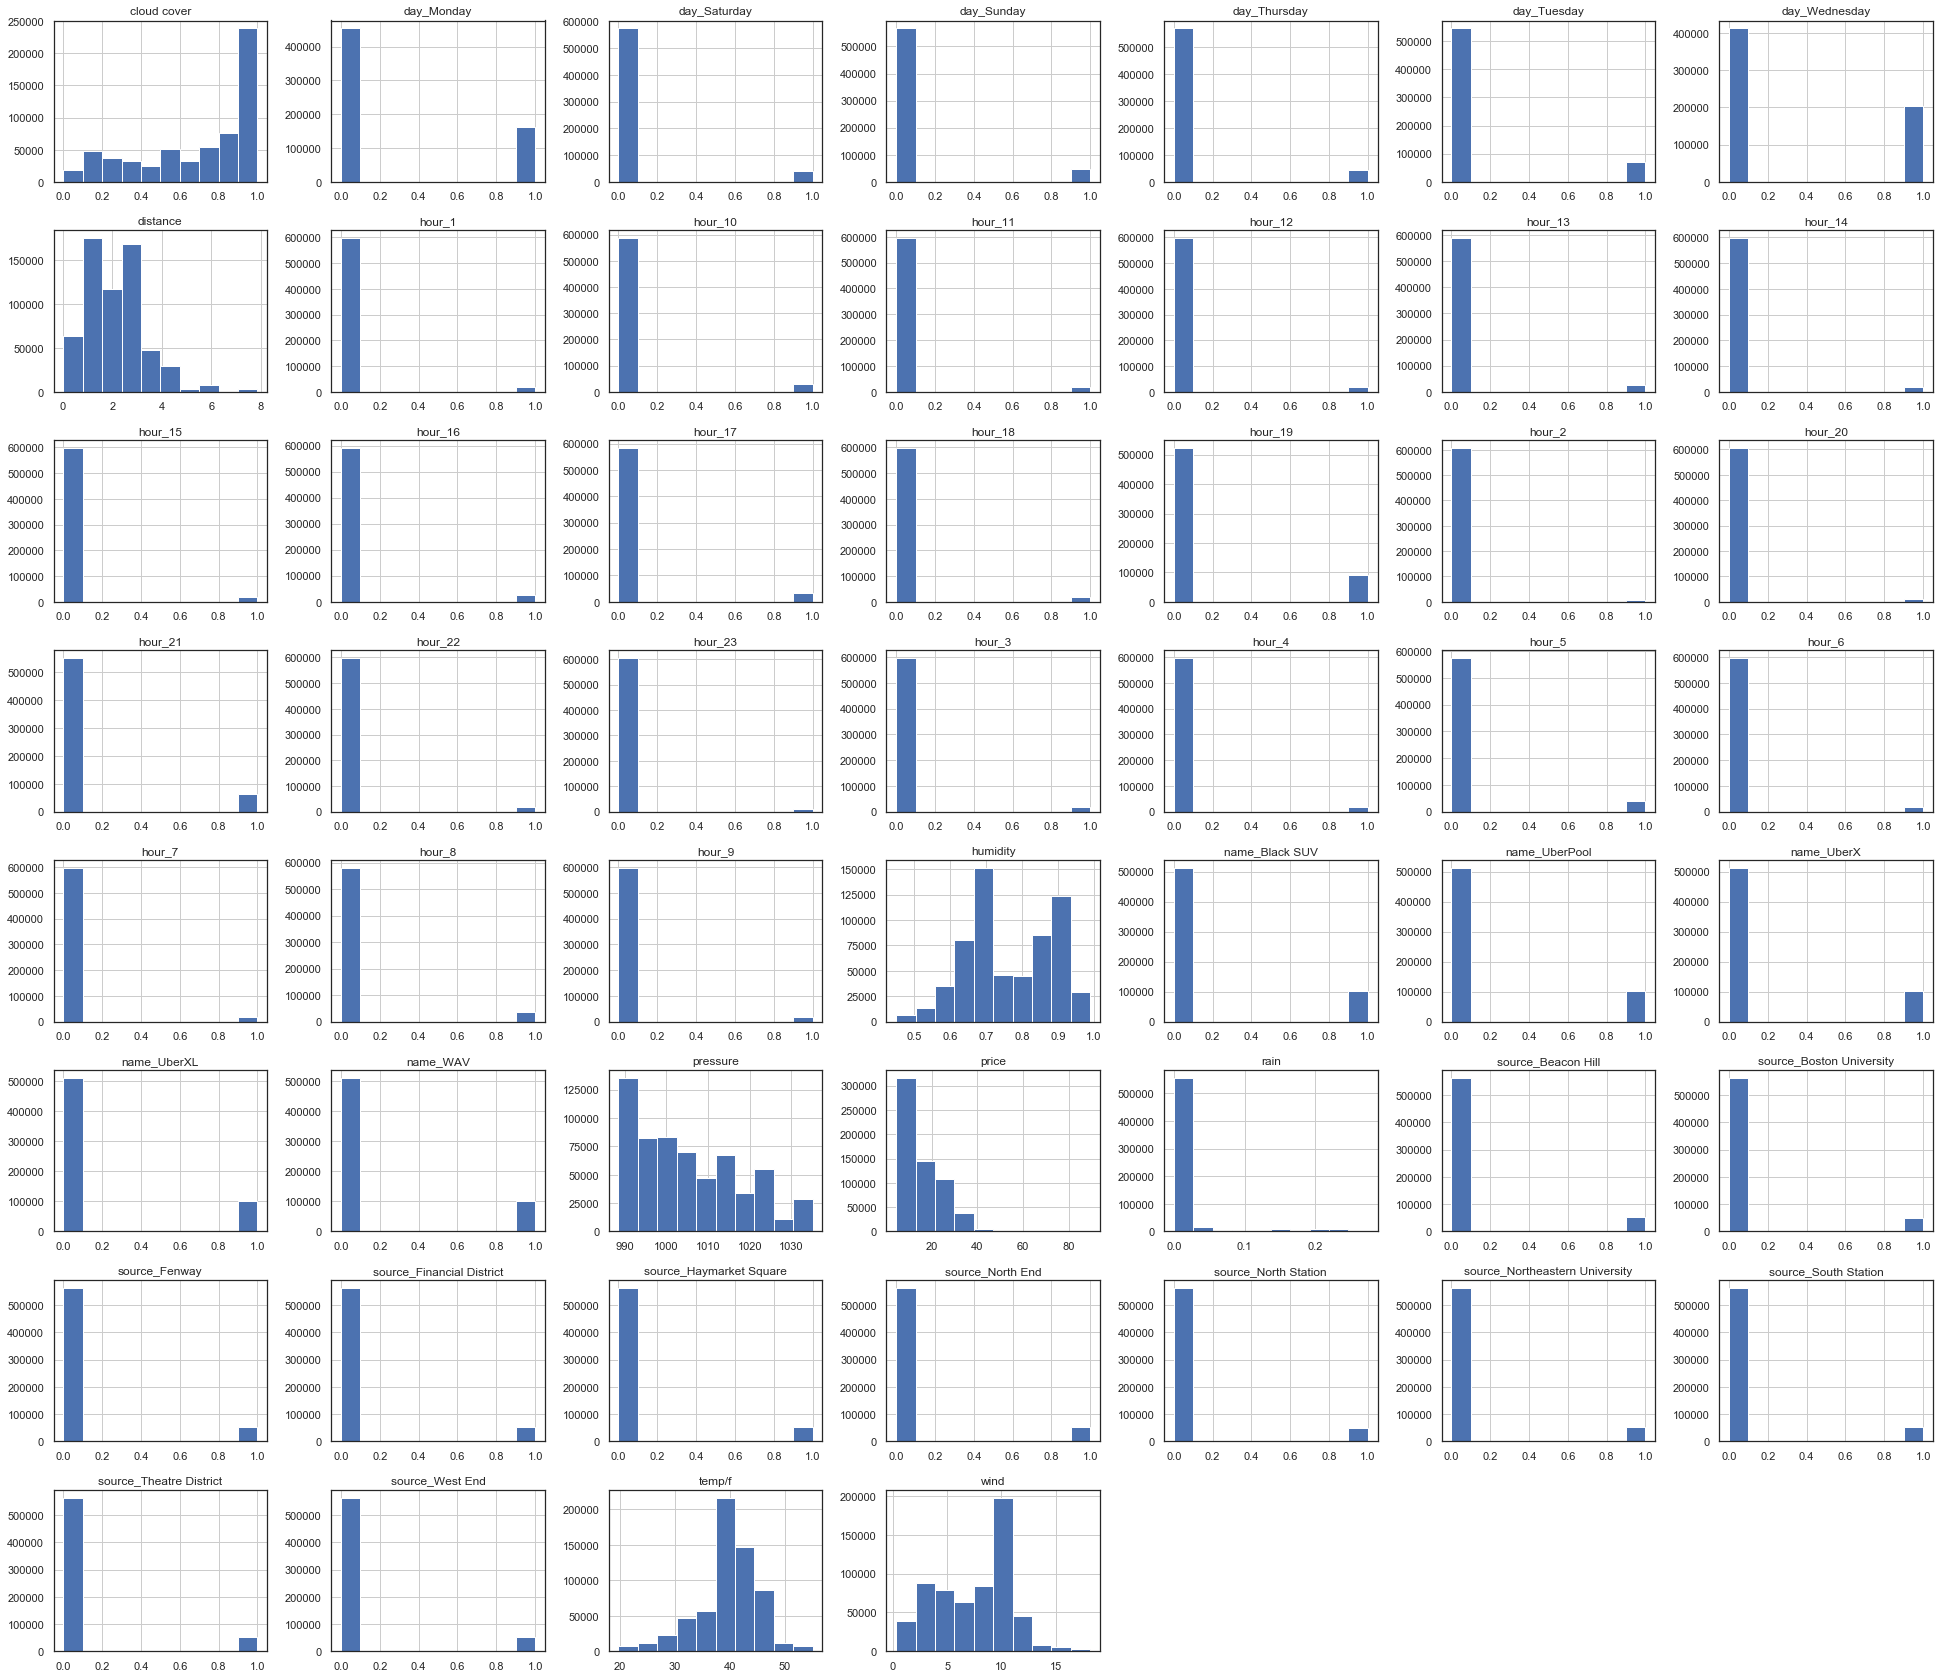

In [77]:
uber_data.hist(figsize=(30, 30))

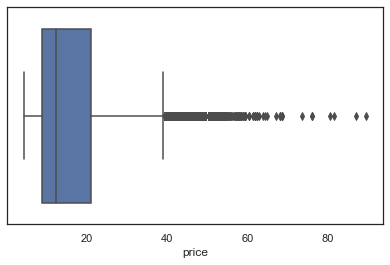

In [78]:
sns.boxplot(uber_data['price'])

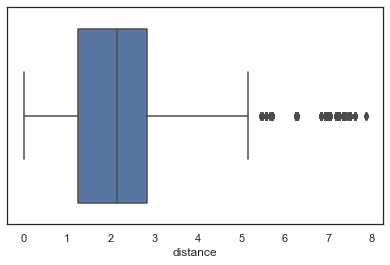

In [79]:
sns.boxplot(uber_data['distance'])

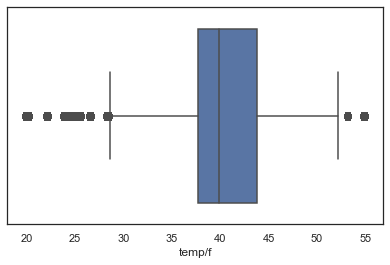

In [80]:
sns.boxplot(uber_data['temp/f'])

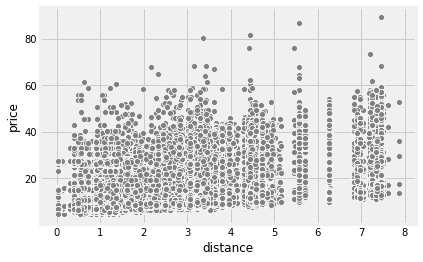

In [48]:
#Plotting some scatter plot of distance against the price
sns.scatterplot(y = uber_data['price'], x = uber_data['distance'], color="gray")

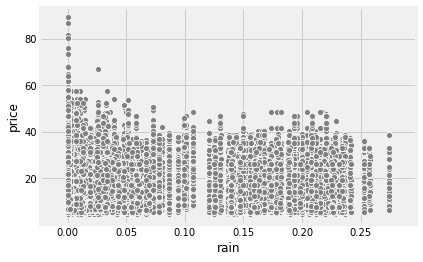

In [47]:
#Plotting some scatter plot of rain against the price
sns.scatterplot(y = uber_data['price'], x = uber_data['rain'], color="gray")

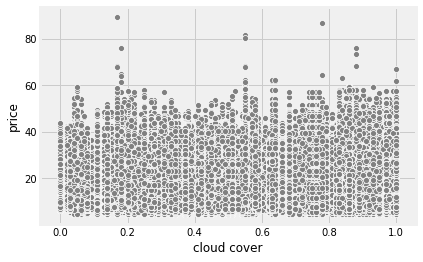

In [46]:
#Plotting some scatter plot of distance against the price
sns.scatterplot(y = uber_data['price'], x = uber_data['cloud cover'], color="gray")

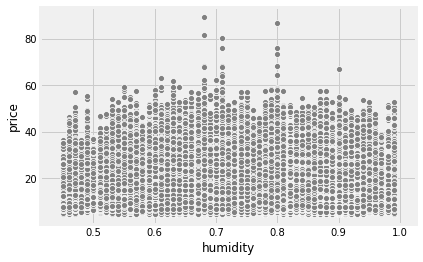

In [45]:
#Plotting some scatter plot of humidity against the price
sns.scatterplot(y = uber_data['price'], x = uber_data['humidity'], color="gray")

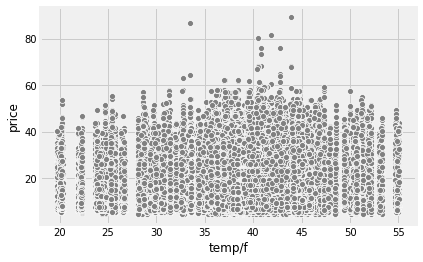

In [43]:
#Plotting some scatter plot of temperature against the price
sns.scatterplot(y = uber_data['price'], x = uber_data['temp/f'], color="gray")

[Back to top](#top)

<a name="Building the Linear regression model for Uber"></a>
# Building the Linear regression model for Uber

## Train-Test Split

In [77]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']
uX = uber_data[features]
uy = uber_data[['price']]
#np.ravel(uy)

In [186]:
uX.shape

(615126, 52)

In [78]:
uX_train, uX_test, uy_train, uy_test = train_test_split(uX,uy,random_state=23, test_size =0.3, shuffle = True)


In [178]:
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    #('ls', Lasso()),
    #('rd', Ridge())
    ('lr',LinearRegression()),
    #('gnb',GaussianNB())
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {

}


In [179]:
cross_val_score(pipe, uX_train, uy_train, cv=3).mean()


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Dat

0.9336793252427089

In [180]:
gs_1 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_1 = gs_1.fit(uX_train,uy_train)
print(gs_1.best_score_)
print(gs_1.best_estimator_)
gs_1.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.0s finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.9336793247069093
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])


{}

In [79]:
ss = StandardScaler()
ss.fit(uX_train) 
uX_train = ss.transform(uX_train)
uX_test = ss.transform(uX_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [97]:
reg = LinearRegression().fit(uX_train,uy_train)
reg.score(uX_train,uy_train)

0.9336949579076886

In [130]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']

In [131]:
len(col)

52

In [132]:
features= pd.Series(features)

In [133]:
features.head()

0       distance
1         temp/f
2    cloud cover
3       pressure
4           rain
dtype: object

In [147]:
y = reg.coef_

df = pd.DataFrame(y)
df = df.T
df['features'] = features
df = df.set_index('features')
df = df.rename(columns = {0: 'coef'})
df.head()

,coef
features,
distance,2.928461
temp/f,0.082571
cloud cover,0.118814
pressure,0.319450
rain,0.017283


In [161]:
abs_coef = abs(df['coef']).sort_values(ascending = False)
#df.sort_values(abs_coef)
abs_coef

features
name_UberPool                     4.482905
name_WAV                          4.077237
name_UberX                        4.072570
name_Black SUV                    3.548915
distance                          2.928461
name_UberXL                       1.923022
hour_17                           0.323178
pressure                          0.319450
day_Wednesday                     0.249969
day_Monday                        0.242678
hour_19                           0.216452
hour_18                           0.179990
source_Financial District         0.158204
source_North End                  0.142860
source_Haymarket Square           0.134878
hour_6                            0.119212
cloud cover                       0.118814
day_Tuesday                       0.114961
source_Northeastern University    0.114055
hour_16                           0.109393
source_Theatre District           0.086837
hour_4                            0.082728
temp/f                            0.082571
da

In [82]:
reg.score(uX_test,uy_test)

0.9336701567879693

In [181]:
gs_1.score(uX_train,uy_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9336949579076886

In [182]:
gs_1.score(uX_test,uy_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9336701567879693

In [183]:
uy_pred = gs_1.predict(uX_test)
uy_test['predicted'] = uy_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [184]:
uy_test.head()

,price,predicted
70847,10.0,12.176483
109090,8.0,8.281441
297096,23.0,23.131140
481423,11.5,13.940180
310798,25.0,17.218849


In [185]:
uy_pred

array([[12.17648265],
       [ 8.28144126],
       [23.13113994],
       ...,
       [27.40683855],
       [31.40605521],
       [14.73090117]])

## Residual Plot for Uber Price using Linear Regression Model

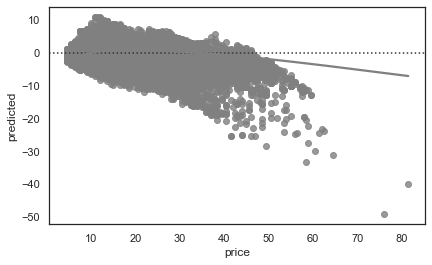

In [186]:
sns.residplot(uy_test['price'], uy_test['predicted'], lowess=True, color="gray")

In [187]:
uy_test['diff'] = uy_test['predicted'] - uy_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [188]:
uy_test.head()

,price,predicted,diff
70847,10.0,12.176483,2.176483
109090,8.0,8.281441,0.281441
297096,23.0,23.131140,0.131140
481423,11.5,13.940180,2.440180
310798,25.0,17.218849,-7.781151


In [189]:
uy_test['diff'].describe()

count    184538.000000
mean         -0.004587
std           2.205276
min         -53.326226
25%          -0.971035
50%           0.197327
75%           1.281221
max          11.287586
Name: diff, dtype: float64

In [194]:
uy_test.head()

,price,predicted,diff
70847,10.0,12.176483,2.176483
109090,8.0,8.281441,0.281441
297096,23.0,23.131140,0.131140
481423,11.5,13.940180,2.440180
310798,25.0,17.218849,-7.781151


In [195]:
#RMSE Score for train data
y_hat_train = gs_1.predict(uX_train)
np.sqrt(mean_squared_error(uy_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.194835798871667

In [196]:
#RMSE Score for test data
y_hat_test = gs_1.predict(uX_test)
np.sqrt(mean_squared_error(uy_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.2052748083172378

In [103]:
uX_train = sm.add_constant(uX_train)
res = sm.OLS(uy_train, uX_train).fit()
print(res.summary())

/Users/malai/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.166e+05
Date:                Mon, 08 Jul 2019   Prob (F-statistic):               0.00
Time:                        13:29:02   Log-Likelihood:            -9.4947e+05
No. Observations:              430588   AIC:                         1.899e+06
Df Residuals:                  430535   BIC:                         1.900e+06
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

[Back to top](#top)

<a name="2nd Model for Uber Data Using Elastic Net"></a>
## 2nd Model for Uber Data Using Elastic Net

In [9]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']
uX = uber_data[features]
uy = uber_data[['price']]
#uy = np.ravel(uy)

### Train-Test Split

In [10]:
uX_train, uX_test, uy_train, uy_test = train_test_split(uX,uy,random_state=49, test_size =0.3, shuffle = True)

In [11]:
uX_train.shape

(430588, 52)

In [12]:
uy_train.shape

(430588, 1)

In [13]:
#Pipeline
pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    ('en',ElasticNet()),
    #('rtr',  RandomForestRegressor())
    #('lr',LinearRegression()),
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {
   'en__l1_ratio' : [0,0.5,1],
    'en__alpha' : [.0001, .10, 0.5 , 1.0, 2.0]
}



In [14]:
cross_val_score(pipe, uX_train, uy_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Dat

0.7494263535538538

In [15]:
#GridSearch
gs_4 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_4.fit(uX_train,uy_train)
print(gs_4.best_score_)
print(gs_4.best_estimator_)
gs_4.best_params_

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  7.4min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.9334023422115314
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('en', ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])


{'en__alpha': 0.0001, 'en__l1_ratio': 1}

In [16]:
gs_4.score(uX_train,uy_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9334190715482389

In [17]:
gs_4.score(uX_test,uy_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9343158147479884

In [18]:
uy4_pred = gs_4.predict(uX_test)
uy_test['predicted_4'] = uy4_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
uy_test['diff_4'] = uy_test['predicted_4'] - uy_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
uy_test.head()

,price,predicted_4,diff_4
448995,29.5,24.879821,-4.620179
434774,37.0,34.867876,-2.132124
359848,12.0,12.507052,0.507052
282698,11.5,10.554801,-0.945199
472932,31.5,27.333478,-4.166522


In [21]:
uy_test['diff_4'].sort_values(ascending = True).head(100)

31743    -47.372517
128833   -46.603907
583465   -38.638072
243026   -35.005544
250453   -34.149651
128836   -33.650444
68052    -33.051101
249189   -30.615205
107002   -30.541495
95947    -29.193809
89073    -29.154232
579047   -28.473310
240861   -27.613114
194484   -27.511592
357001   -27.452872
514922   -27.282615
235557   -27.066757
143209   -26.948004
596754   -26.617030
422094   -26.474101
6669     -26.448716
347413   -26.010150
512455   -24.784784
194191   -24.337985
194193   -24.336534
194189   -24.306378
194192   -24.291042
411974   -23.695140
249709   -23.604331
604668   -23.305968
            ...    
137425   -18.441369
519669   -18.349317
250451   -18.196187
447343   -18.133022
28471    -18.086148
413748   -17.913735
434471   -17.896223
132510   -17.894110
236255   -17.884739
284183   -17.744878
489584   -17.735745
361544   -17.733365
567718   -17.687418
567719   -17.660404
145490   -17.635183
97063    -17.614706
55767    -17.525187
34297    -17.392152
34295    -17.376307


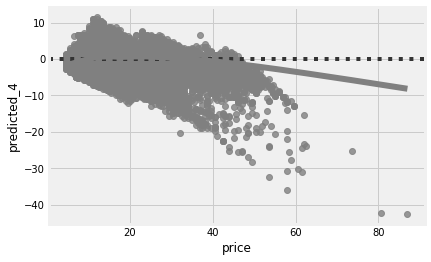

In [26]:
# Level of confidence, residual plots
sns.residplot(uy_test['price'], uy_test['predicted_4'], lowess=True, color="gray")

In [27]:
#RMSE Score for train data for Elastic Net
y_hat_train = gs_4.predict(uX_train)
np.sqrt(mean_squared_error(uy_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.2027934790269366

In [28]:
#RMSE Score for test data for Elastic Net
y_hat_train = gs_4.predict(uX_test)
np.sqrt(mean_squared_error(uy_test['price'], y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


2.1866902167747684

[Back to top](#top)

<a name="3rd Model for Uber Data Using Random Forest Regressor"></a>
## 3rd Model for Uber Data Using Random Forest Regressor

In [175]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']
uX = uber_data[features]
uy = uber_data[['price']]
#uy = np.ravel(uy)

### Train-Test Split

In [176]:
uX_train, uX_test, uy_train, uy_test = train_test_split(uX,uy,random_state=49, test_size =0.3, shuffle = True)

In [177]:
uX_train.shape

(430588, 52)

In [178]:
uy_train.shape

(430588, 1)

In [187]:
#pipeline

pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    ('rtr',  RandomForestRegressor())
    #('lr',LinearRegression()),
    #('svr', SVR()),
    #('xgb', XGBRegressor())
    
    ])
pipe_params = {
   #'rtr__max_depth' : [None, 20, 25],
   # 'rtr__n_estimators' : [25,30, 35]
    'rtr__max_depth' : [20],
   'rtr__n_estimators' : [30]
    
}



In [188]:
cross_val_score(pipe, uX_train, uy_train, cv=3).mean()

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/Users/malai/anaconda3

0.9738424675806855

In [189]:
# Grid-Search
gs_2 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_2.fit(uX_train,uy_train)
print(gs_2.best_score_)
print(gs_2.best_estimator_)
gs_2.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


0.9750870477981055
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('rtr', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])


{'rtr__max_depth': 20, 'rtr__n_estimators': 30}

In [190]:
gs_2.score(uX_train,uy_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9855811884506511

In [191]:
gs_2.score(uX_test,uy_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9761086092635932

In [192]:
pickle.dump(gs_2, open('model.pkl','wb'))

In [113]:
uy2_pred = gs_2.predict(uX_test)
uy_test['predicted_2'] = uy2_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
uy_test['diff_2'] = uy_test['predicted_2'] - uy_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [115]:
uy_test.head()

,price,predicted_2,diff_2
448995,29.5,27.698880,-1.801120
434774,37.0,40.559167,3.559167
359848,12.0,11.692563,-0.307437
282698,11.5,10.395599,-1.104401
472932,31.5,31.033543,-0.466457


In [116]:
uy_test['diff_2'].sort_values(ascending = True).head(100)

128833   -44.063352
31743    -39.676116
250453   -34.500000
107002   -32.149129
128836   -31.587100
68052    -29.316616
235557   -29.306909
583465   -28.958889
579047   -28.735578
357001   -26.742147
243026   -25.398148
604668   -23.732669
249709   -23.367507
19900    -23.348369
194189   -21.605183
89073    -21.304826
90181    -21.220624
194192   -20.867248
194193   -20.840296
194191   -20.714609
194484   -20.647471
69157    -20.622851
171981   -20.487809
512455   -20.436111
250451   -19.905413
492841   -19.329465
270818   -19.255595
504969   -19.235914
357002   -19.002287
609366   -19.000194
            ...    
409395   -14.220624
245032   -14.158407
34295    -14.141241
538514   -14.119038
244763   -14.117231
104364   -14.020616
538515   -13.967792
447343   -13.957979
52162    -13.767552
364643   -13.709218
19902    -13.705830
49832    -13.681438
337406   -13.617882
33860    -13.569599
6909     -13.539013
342467   -13.531201
507352   -13.495477
54148    -13.318676
583468   -13.303333


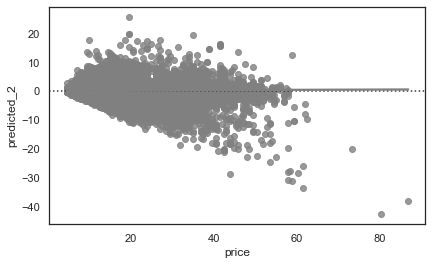

In [121]:
# Level of confidence, residual plots
sns.residplot(uy_test['price'], uy_test['predicted_2'], lowess=True, color="gray")

In [122]:
#RMSE Score for train data for Random Forest Regressor
y_hat_train = gs_2.predict(uX_train)
np.sqrt(mean_squared_error(uy_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.0282502397506892

In [123]:
#RMSE Score for test data for Random Forest Regressor
y_hat_train = gs_2.predict(uX_test)
np.sqrt(mean_squared_error(uy_test['price'], y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.3168003448502612

[Back to top](#top)

<a name="4th Model for Lyft Data Using XGBOOST Regressor"></a>
## 4th Model for Lyft Data Using XGBOOST Regressor

In [149]:
features = ['distance', 'temp/f', 'cloud cover', 'pressure', 'rain',
       'humidity', 'wind', 'day_Monday', 'day_Saturday', 'day_Sunday',
       'day_Thursday', 'day_Tuesday', 'day_Wednesday', 'source_Beacon Hill',
       'source_Boston University', 'source_Fenway',
       'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'name_Black SUV', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV']
uX = uber_data[features]
uy = uber_data[['price']]
#np.ravel(uy)

In [150]:
uX_train, uX_test, uy_train, uy_test = train_test_split(uX,uy,random_state=23, test_size =0.3, shuffle = True)


In [29]:
#Pipeline

pipe = Pipeline([
    ('ss', StandardScaler()),
    #('ext', ExtraTreesRegressor()),
    #('en',ElasticNet()),
    #('ls', Lasso()),
    #('rd', Ridge())
    #('lr',LinearRegression()),
    #('gnb',GaussianNB())
    #('svr', SVR()),
    ('xgb', XGBRegressor())
    
    ])
pipe_params = {
   #'xgb__booster' : ['gblinear'],
    'xgb__max_depth' : [10,15,20],
}


In [158]:
cross_val_score(pipe, uX_train, uy_train, cv=3).mean()


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[15:48:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[15:49:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[15:50:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9484305832084189

In [159]:
#Grid-Search
gs_3 = GridSearchCV(pipe, param_grid=pipe_params, cv=3, verbose=1, n_jobs= -1)
gs_3 = gs_3.fit(uX_train,uy_train)
print(gs_3.best_score_)
print(gs_3.best_estimator_)
gs_3.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 19.4min finished
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


[16:10:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9771968260977163
Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('xgb', XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=15, min_ch...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])


{'xgb__max_depth': 15}

In [160]:
gs_3.score(uX_train,uy_train)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9867679388321503

In [161]:
gs_3.score(uX_test,uy_test)

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:511: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9785869617115057

In [162]:
uy_pred = gs_3.predict(uX_test)
uy_test['predicted'] = uy_pred

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [163]:
uy_test.head()

,price,predicted
70847,10.0,7.178537
109090,8.0,8.446917
297096,23.0,23.444975
481423,11.5,11.575906
310798,25.0,19.507071


In [164]:
uy_pred

array([ 7.1785374,  8.446917 , 23.444975 , ..., 27.434149 , 32.810333 ,
       15.836756 ], dtype=float32)

## Residual Plot for Uber Price

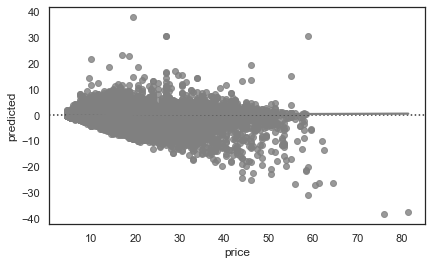

In [165]:
sns.residplot(uy_test['price'], uy_test['predicted'], lowess=True, color="gray")

In [166]:
uy_test['diff'] = uy_test['predicted'] - uy_test['price']

/Users/malai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
uy_test.head()

,price,predicted,diff
70847,10.0,7.178537,-2.821463
109090,8.0,8.446917,0.446917
297096,23.0,23.444975,0.444975
481423,11.5,11.575906,0.075906
310798,25.0,19.507071,-5.492929


In [168]:
uy_test['diff'].describe()

count    184538.000000
mean         -0.006967
std           1.252973
min         -39.715397
25%          -0.281622
50%           0.042762
75%           0.400746
max          38.024540
Name: diff, dtype: float64

In [173]:
uy_test.head()

,price,predicted,diff
70847,10.0,7.178537,-2.821463
109090,8.0,8.446917,0.446917
297096,23.0,23.444975,0.444975
481423,11.5,11.575906,0.075906
310798,25.0,19.507071,-5.492929


In [174]:
#RMSE Score for train data,XGBOOST
y_hat_train = gs_3.predict(uX_train)
np.sqrt(mean_squared_error(uy_train, y_hat_train))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.9804885073322732

In [175]:
#RMSE Score for test data,XGBOOST
y_hat_test = gs_3.predict(uX_test)
np.sqrt(mean_squared_error(uy_test['price'], y_hat_test))

/Users/malai/anaconda3/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


1.2529893446731624

<a name="Results of Summary"></a>
# Results of Summary

| Models| Linear Regression | Elastic Net | XGB Regressor | Random Forest Regressor |
| --- | --- | --- | --- | --- |
| Train R^2 |0.933694 | 0.933419 |0.986767 |0.985581 |
| Test R^2 |0.933670 | 0.934315 |0.978586 |0.976108 |
| Change in R^2 |0.000024 | -0.000896 |0.008181 |0.009473 |
| Train RMSE | 2.19483 | 2.20279 |0.98048 |1.02825 |
| Test RMSE | 2.20527 | 2.18669 |1.25298 |1.31680|

[Back to top](#top)